In [1]:
import sys
import keras
import tensorflow as tf

print('python version:', sys.version)
print('keras version:', keras.__version__)
print('tensorflow version:', tf.__version__)

Using TensorFlow backend.


python version: 3.6.10 |Anaconda, Inc.| (default, Mar 23 2020, 17:58:33) [MSC v.1916 64 bit (AMD64)]
keras version: 2.3.1
tensorflow version: 2.1.0


# 6.3 Sequence processing with convnets

### Parsing the IMDB data

In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
max_len = 500

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen = max_len)
x_test = sequence.pad_sequences(x_test, maxlen = max_len)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


### Training and evaluating a simple 1D convnet on the IMDB data

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
____________________________________________

C:\Users\alexa\anaconda3\envs\keras-gpu\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 94us/step - loss: 0.7583 - acc: 0.5239 - val_loss: 0.6838 - val_acc: 0.5424
Epoch 2/10
20000/20000 [==============================] - 2s 85us/step - loss: 0.6619 - acc: 0.6696 - val_loss: 0.6568 - val_acc: 0.6836
Epoch 3/10
20000/20000 [==============================] - 2s 84us/step - loss: 0.6112 - acc: 0.7630 - val_loss: 0.5899 - val_acc: 0.7604
Epoch 4/10
20000/20000 [==============================] - 2s 84us/step - loss: 0.5052 - acc: 0.8131 - val_loss: 0.4677 - val_acc: 0.8096
Epoch 5/10
20000/20000 [==============================] - 2s 84us/step - loss: 0.3915 - acc: 0.8504 - val_loss: 0.4003 - val_acc: 0.8422
Epoch 6/10
20000/20000 [==============================] - 2s 85us/step - loss: 0.3316 - acc: 0.8688 - val_loss: 0.3938 - val_acc: 0.8384
Epoch 7/10
20000/20000 [==============================] - 2s 84us/step - loss: 0.2924 - acc: 0.8671 - val_loss: 0.3851 - val_acc:

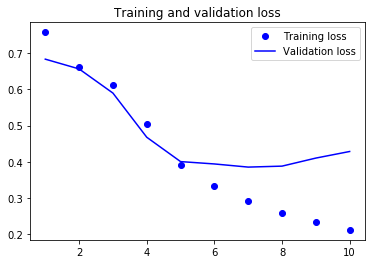

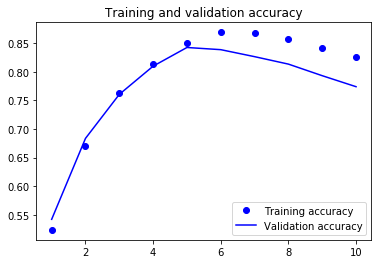

In [12]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length = max_len))
model.add(layers.Conv1D(32, 7, activation = 'relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation = 'relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer = RMSprop(lr = 1e-4),
             loss = 'binary_crossentropy',
             metrics = ['acc'])

history = model.fit(x_train, y_train,
                   epochs = 10,
                   batch_size = 128,
                   validation_split = 0.2)


import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.figure()
plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()